In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/Users/samanthazheng/Desktop/nhl-game-data/game_teams_stats.csv')
print(df)

          game_id  team_id   HoA    won settled_in        head_coach  goals  \
0      2011030221        1  away  False         OT      Peter DeBoer      3   
1      2011030221        4  home   True         OT  Peter Laviolette      4   
2      2011030222        1  away   True        REG      Peter DeBoer      4   
3      2011030222        4  home  False        REG  Peter Laviolette      1   
4      2011030223        4  away  False         OT  Peter Laviolette      3   
...           ...      ...   ...    ...        ...               ...    ...   
22863  2018030415        6  home  False        REG     Bruce Cassidy      1   
22864  2018030416        6  away   True        REG     Bruce Cassidy      5   
22865  2018030416       19  home  False        REG      Craig Berube      1   
22866  2018030417       19  away   True        REG      Craig Berube      4   
22867  2018030417        6  home  False        REG     Bruce Cassidy      1   

       shots  hits  pim  powerPlayOpportunities  po

## Data Manipulation

In [6]:
df['HoA'] = df['HoA'].map(dict(home=1, away=0))
df['won'] = df['won'].astype(int)
df['settled_in'] = df['settled_in'].map(dict(REG=1, OT=0))

In [7]:
df = df.drop(columns=["game_id", "team_id", "head_coach"])

In [8]:
df.dtypes

HoA                         int64
won                         int64
settled_in                float64
goals                       int64
shots                       int64
hits                        int64
pim                         int64
powerPlayOpportunities      int64
powerPlayGoals              int64
faceOffWinPercentage      float64
giveaways                   int64
takeaways                   int64
dtype: object

In [9]:
df.rename(
    columns={
        "HoA": "home",
        "settled_in": "reg_game",
        "won": "win"
    },
    inplace=True
)

In [10]:
win = df['win']
df.drop(labels=['win'], axis=1,inplace = True)
df.insert(0, 'win', win)
df

,win,home,reg_game,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,0,0,0.0,3,26,31,12,3,1,44.9,6,7
1,1,1,0.0,4,36,27,6,6,1,55.1,13,4
2,1,0,1.0,4,35,32,12,4,0,50.9,8,7
3,0,1,1.0,1,20,24,32,5,0,49.1,9,6
4,0,0,0.0,3,28,28,4,5,1,50.8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22863,0,1,1.0,1,39,43,2,3,0,40.6,4,11
22864,1,0,1.0,5,32,27,10,4,1,41.3,4,10
22865,0,1,1.0,1,29,29,20,4,0,58.7,12,11
22866,1,0,1.0,4,20,36,2,0,0,49.0,7,8


## Data Visualization

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

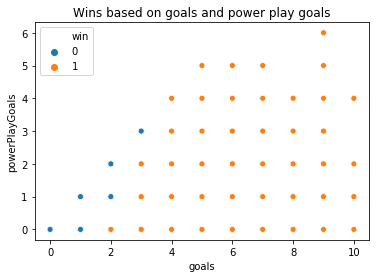

In [12]:
sns.scatterplot(df['goals'], df['powerPlayGoals'], hue=df['win'])
plt.title('Wins based on goals and power play goals')
plt.xlabel('goals')
plt.ylabel('powerPlayGoals')
plt.show()

By plotting goals vs power play goals and highlighting wins, it can be seen that a team that scores 3 power play goals or more will win the game. In a typical game, it is not very common to reach 3 power goals, so using the number of power play goals scaored would not be a good predictor of whether or not a team will win the game. Up to three power play goals, the team also has to score even strength goals in order to win the match. This makes sense since even strength goals are a good indicator of the team's skill as opposed to its abilities during power plays. As 4 goals is typically a higher amount in hockey, regardless of whether the goals are even strength or power play, it is likely the team will win as many opponent teams will not be able to catch up to 4 goals.  

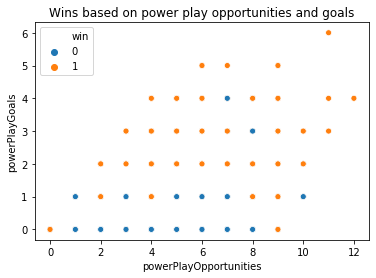

In [13]:
sns.scatterplot(df['powerPlayOpportunities'], df['powerPlayGoals'], hue=df['win'])
plt.title('Wins based on power play opportunities and goals')
plt.xlabel('powerPlayOpportunities')
plt.ylabel('powerPlayGoals')
plt.show()

By plotting power play opportunities to power play goals, we can see the necessary amount of power play goals a team needs to score in order to win a game. Power plays are usually seen as an opportunity for a team to pull ahead in a game and increases the chances of winning. However, as seen through this visualization, teams would have to score at least two power play goals in order to secure a win, meaning they would have to gain at least two or more power play opportunities. 

Text(0.5, 1.0, 'Faceoff Win Distribution versus Game Wins')

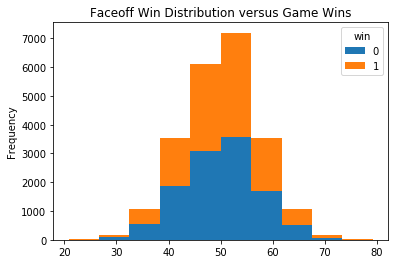

In [14]:
df.pivot(columns='win').faceOffWinPercentage.plot(kind = 'hist', stacked=True)
plt.title("Faceoff Win Distribution versus Game Wins")

Regardless of whether or not a team won or lost, the distribution for faceoff wins is similar, with most teams at between 50% to 60% faceoff wins. This shows that faceoff wins does not necessarily predict whether or not a team will win a match. As faceoffs are typically done by the same players each match, a team's faceoff stats will generally be similar game to game, but the outcome of the game will be dictated by the game plays and skill levels. However, we can assume that teams with a better playoff win percentage would have a better win record, as seen by the greater proportion of winning teams with higher faceoff win percentages. With more face off wins, the team have an advantage because they start each play with possession of the puck, giving them the opportunity to start attacking. But the team's skill dictates whether or not they stay in possession of the puck and are able to capitalize on attacking opportunities to score goals. 

Text(0.5, 1.0, 'Shot Distribution versus game Wins')

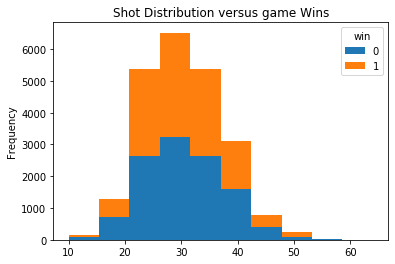

In [15]:
df.pivot(columns='win').shots.plot(kind = 'hist', stacked=True)
plt.title("Shot Distribution versus game Wins")

The shot distribution for winning and losing teams are similar (most games are between 25 to 30 shots). The main difference is that more winning teams stay within this range, hinting at more players making shots more consistent and the quality of those players. In games with more or less shots, the outcome is a bit more random, indicating games that are with more unusual events (very little/many attacking plays, mistakes, fouls, etc). This plot reveals the consistency aspect of a team's players since teams with higher skilled players would be able to make a similar number of shots game to game versus teams with lower skilled players. 